In [9]:
import librosa
import numpy as np

def estimate_gender(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    # 提取基频
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    f0 = f0[voiced_flag]  # 只考虑有声部分的基频
    if len(f0) == 0:
        return "无法检测基频"
    
    avg_f0 = np.nanmean(f0)
    
    if avg_f0 < 165:
        return "男性",f0
    elif avg_f0 > 180:
        return "女性",f0
    else:
        return "不确定",f0

# 使用示例
gender,f0 = estimate_gender("/home/xinying/Speaker2/project-speech_classification/dataset/3-FETB0_FGWR0_FSAG0=concatenate_SX248.WAV")
print("检测的性别为：", gender)


检测的性别为： 女性


In [10]:
import os
audio_path='/home/xinying/Speaker2/project-speech_classification/dataset/'
count=0
acc=0
for file in os.listdir('/home/xinying/Speaker2/project-speech_classification/dataset/'):
    if file[0]=='1':
        count+=1
        gender=-1
        pgender=-1
        y, sr = librosa.load(os.path.join(audio_path,file), sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
        if file[2]=="M":
            gender = 0
        else:
            gender = 1
        f0 = f0[voiced_flag]  # 只考虑有声部分的基频

    
        avg_f0 = np.nanmean(f0)
        
        if avg_f0 < 165: #Male
           pgender=0
        elif avg_f0 > 180:
            pgender=1 #Female
        if gender == pgender:
            acc+=1
print(acc,count)

        




SystemError: CPUDispatcher(<function _viterbi at 0x7f095c2e2050>) returned a result with an exception set

In [68]:
from IPython.display import display, Audio
# audio_path="/home/xinying/Speaker2/project-speech_classification/dataset/2-MAJC0_FMKF0=concatenate_SX25.WAV"
# audio_path="/home/xinying/Speaker2/project-speech_classification/dataset/2-MAJC0_FMKC0=overlay_SI1946.WAV"
# audio_path="/home/xinying/Speaker2/output.wav"

# audio_path="/home/xinying/Speaker2/output.wav"
# audio_path="/home/xinying/Speaker_L/TIMIT_Dataset/data/cancat3/3-FBMJ0_FGMB0_FJWB1=SI1776.WAV"
# audio_path="/home/xinying/Speaker2/seperate_speech/record.wav"
audio_path="/home/xinying/Speaker_L/TIMIT_Dataset/data/raw_augmented/3-FCJS0_FHLM0_FSLB1=concatenate_SA2.WAV"
# audio_path="/home/xinying/Speaker2/project-speech_classification/dataset/1-FBCG1=origin_SX442.WAV"

ValueError: operands could not be broadcast together with shapes (440,) (224944,) 

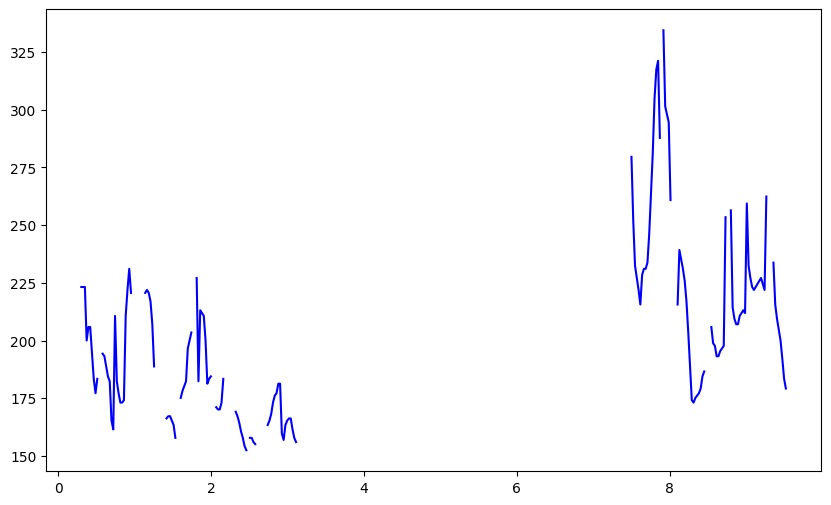

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_f0(audio_path,  color):
    y, sr = librosa.load(audio_path, sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=500)
    times = librosa.times_like(f0, sr=sr)  # 获取时间轴
    plt.plot(times, f0, label=f"Voice", color=color)
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=500)
    # times = librosa.times_like(y, sr=sr)  # 获取时间轴
    # print(times.shape)
    # print(y.shape)
    # plt.plot(times, y, label=f"Voice", color=color)
    plt.fill_between(times, y, 0, where=voiced_flag, color=color, alpha=0.3)

# 配置绘图
plt.figure(figsize=(10, 6))

# 加载并绘制男性声音的基频
plot_f0('/home/xinying/Speaker_L/TIMIT_Dataset/data/cancat2/2-FAEM0_FRAM1=SA1.WAV', 'blue')

# 加载并绘制女性声音的基频
# plot_f0('/home/xinying/Speaker_L/TIMIT_Dataset/data/TEST/DR1/FAKS0/SA1.WAV', 'Female', 'red')

plt.title('Fundamental Frequency (F0) Comparison Between Male and Female Voices')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.ylim(0, 300)  # 限制y轴范围以更清晰地展示男女声音的基频差异
plt.show()

float32


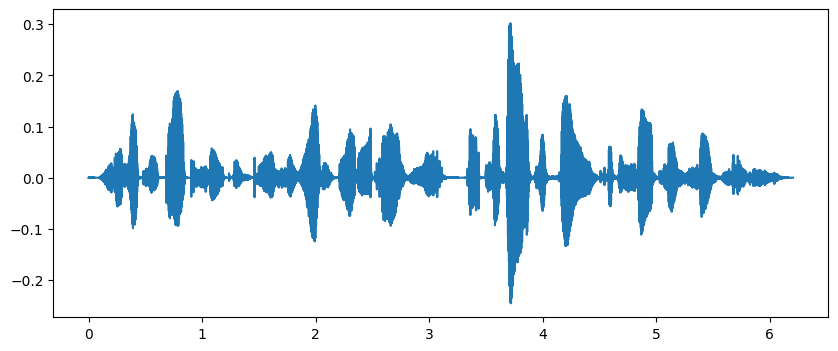

In [59]:
audio_path="/home/xinying/Speaker_L/TIMIT_Dataset/data/cancat2/2-FAEM0_FRAM1=SA1.WAV"
color='blue'
y, sr = librosa.load(audio_path, sr=None)
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=500)
threshold = 0.00  # 设定基频能量的阈值
y=y[np.where(abs(y) > 0.00)[0]].astype(np.float32)
audio_trimmed = y
import soundfile as sf
sf.write('audio_trimmed.wav', audio_trimmed, sr)
print(y.dtype)
duration = len(audio_trimmed) / sr
time = np.linspace(0, duration, len(audio_trimmed))
# 绘制波形
plt.figure(figsize=(10, 4))
plt.plot(time, audio_trimmed)

In [177]:
import numpy as np
def detect_silence_intervals(audio_file, zcr_threshold, centroid_threshold, rolloff_threshold, min_silence_duration):
    # 读取音频文件
    audio, sr = librosa.load(audio_file, sr=None)
    
    # 计算零交叉率
    zcr = librosa.feature.zero_crossing_rate(audio, frame_length=2048, hop_length=512)[0]
    
    # 计算频谱质心
    centroid = librosa.feature.spectral_centroid(audio, sr=sr, n_fft=2048, hop_length=512)[0]
    
    # 计算过零率
    rolloff = librosa.feature.spectral_rolloff(audio, sr=sr, n_fft=2048, hop_length=512, roll_percent=0.85)[0]
    
    energy = librosa.feature.rms(audio, frame_length=2048, hop_length=512)[0]
    
    # 根据阈值检测静音段的位置
    silence_intervals = []
    is_silence = []
    for i in range(len(zcr)):
        if  zcr[i] <= zcr_threshold:
            is_silence.append(1) #silence
            # start = librosa.frames_to_time(i, sr=sr)
        else:
            # is_silence = False
            is_silence.append(0)
            # end = librosa.frames_to_time(i, sr=sr)
            
            # if end - start >= min_silence_duration:
            #     silence_intervals.append((start, end))
    from scipy.ndimage import gaussian_filter1d
    smoothed_data = gaussian_filter1d(is_silence, sigma=1)
    
    
    # 找出连续的0的间隔
    test_intervals = []
    start = None
    for i, value in enumerate(smoothed_data):
        if value > 0.5 and start is None:
            # start = i
            test_start = i
            start = librosa.frames_to_time(i, sr=sr)
        elif value <= 0.5 and start is not None:
            # end = i - 1
            test_end=i-1
            end = librosa.frames_to_time(i-1, sr=sr)
            if (end-start) >= min_silence_duration:
                silence_intervals.append((start, end))
                test_intervals.append((test_start,test_end))
            start = None
    if start is not None:
        end = librosa.frames_to_time(len(smoothed_data)-1, sr=sr)
        silence_intervals.append((start, end))
    print(is_silence)
    print(smoothed_data)
    print(silence_intervals)
    print(test_intervals)



    # 创建一个布尔掩码，用于标记静音部分
    mask = np.ones_like(audio, dtype=bool)
    
    # 根据静音间隔标记静音部分
    for interval in silence_intervals:
        start_frame = int(interval[0] * sr)
        end_frame = int(interval[1] * sr)
        
        # 将静音部分的标记置为False
        mask[start_frame:end_frame] = False
        print(start_frame,end_frame)
    # 根据掩码移除静音部分
    new_audio = audio[mask]
    return silence_intervals, new_audio, sr

In [1]:
audio_path="/home/xinying/Speaker2/seperate_speech/record.wav"
audio_path="/home/xinying/Speaker_L/TIMIT_Dataset/data/cancat3/3-MAHH0_FSEM0_FDKN0=SA1.WAV"
audio_path="/home/xinying/Speaker_L/TIMIT_Dataset/data/augmented/2-MTCS0_MPAM0=overlay_SX262.WAV"

In [2]:
import soundfile as sf
import librosa
wav,sr=librosa.load(audio_path, sr=None)
# sf.write("output.wav", wav, sr)

In [3]:
import soundfile
from IPython.display import display, Audio

mixwav, sr = soundfile.read(audio_path)
# waves_wsj = separate_speech(mixwav[None, ...], fs=sr)

# print("Input mixture", flush=True)
display(Audio(mixwav, rate=sr))

In [162]:
silence_intervals, new_audio, sr = detect_silence_intervals(audio_path, zcr_threshold=0.01, centroid_threshold=2000,
                                                         rolloff_threshold=0.1, min_silence_duration=1
)
sf.write("output.wav", new_audio, sr)
print(silence_intervals)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/tmp/ipykernel_3503299/2496216571.py:10: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 1.5258789e-04 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroid = librosa.feature.spectral_centroid(audio, sr=sr, n_fft=2048, hop_length=512)[0]
/tmp/ipykernel_3503299/2496216571.py:13: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 1.5258789e-04 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rolloff = librosa.feature.spectral_rolloff(audio, sr=sr, n_fft=2048, hop_length=512, roll_percent=0.85)[0]
/tmp/ipykernel_3503299/2496216571.py:15: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 1.5258789e-04 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  energy = librosa.feature.rms(audio, frame_le

In [163]:
display(Audio(new_audio, rate=sr))

In [4]:
from speechbrain.inference.separation import SepformerSeparation as separator

# model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
# est_sources = model.separate_file(path=audio_path)
model = separator.from_hparams(source="speechbrain/sepformer-libri3mix", savedir='pretrained_models/sepformer-libri3mix')

# est_sources = model.separate_file(path="output.wav")
est_sources = model.separate_file(path=audio_path)


/home/xinying/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Resampling the audio from 22050 Hz to 8000 Hz


In [178]:
# Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)
sf.write("output22.wav", est_sources[:, :, 0].detach().cpu().squeeze(), 8000)
silence_intervals, new_audio, sr = detect_silence_intervals("output22.wav", zcr_threshold=0.2, centroid_threshold=5000,
                                                         rolloff_threshold=0.9, min_silence_duration=1
)
# sf.write("output22.wav", new_audio, sr)
Audio(new_audio, rate=sr)

[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[(0.576, 1.856), (8.384, 11.712)]
[(9, 29)]
4608 14848
67072 93696


/tmp/ipykernel_3503299/3485384573.py:10: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05  0.0000000e+00 ... -2.7465820e-04
 -3.0517578e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroid = librosa.feature.spectral_centroid(audio, sr=sr, n_fft=2048, hop_length=512)[0]
/tmp/ipykernel_3503299/3485384573.py:13: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05  0.0000000e+00 ... -2.7465820e-04
 -3.0517578e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  rolloff = librosa.feature.spectral_rolloff(audio, sr=sr, n_fft=2048, hop_length=512, roll_percent=0.85)[0]
/tmp/ipykernel_3503299/3485384573.py:15: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05  0.0000000e+00 ... -2.7465820e-04
 -3.0517578e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  energy = librosa.feature.r

In [5]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [7]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

In [8]:
Audio(est_sources[:, :, 2].detach().cpu().squeeze(), rate=8000)

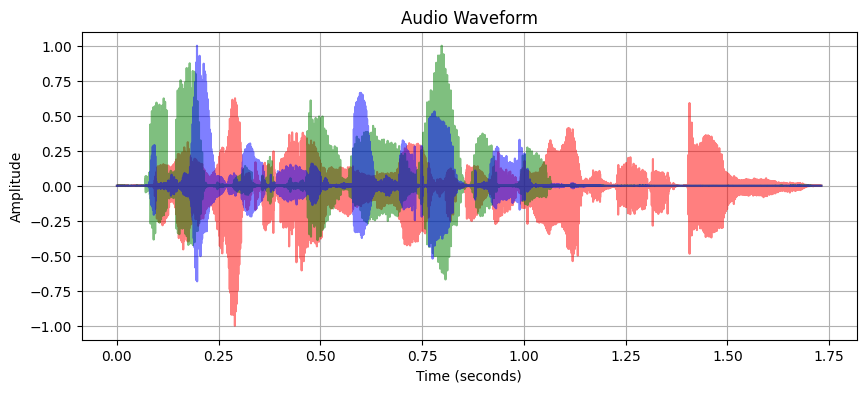

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 est_sources 是你的音频数据，形状为 [1, 80000]
audio_data1 = est_sources[:, :, 0].squeeze()  # 将形状转换为 (80000,)
audio_data2 = est_sources[:, :, 1].squeeze()  # 将形状转换为 (80000,)
audio_data3= est_sources[:, :, 2].squeeze()  # 将形状转换为 (80000,)

# 创建时间轴，假设采样率为 16000 Hz
sr = 16000
times = np.linspace(0, len(audio_data1) / sr, num=len(audio_data1))

# 绘制波形图
plt.figure(figsize=(10, 4))  # 图形大小
plt.plot(times, audio_data1,alpha=0.5, color='red')  # 绘制波形
plt.plot(times, audio_data2,alpha=0.5, color='green')  # 绘制波形
plt.plot(times, audio_data3,alpha=0.5, color='blue')  # 绘制波形
# plt.plot(times, audio_data1,alpa=0.5, )  # 绘制波形
# plt.plot(times, audio_data1,alpa=0.5, )  # 绘制波形


plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [107]:
print(est_sources[:, :, 0].std())
print(est_sources[:, :, 1].std())
print(est_sources[:, :, 2].std())

tensor(0.0867)
tensor(0.0765)
tensor(0.0669)


In [111]:
sf.write("output1.wav", est_sources[:, :, 0].detach().cpu().squeeze(), 8000)
sf.write("output2.wav", est_sources[:, :, 1].detach().cpu().squeeze(), 8000)
sf.write("output3.wav", est_sources[:, :, 2].detach().cpu().squeeze(), 8000)

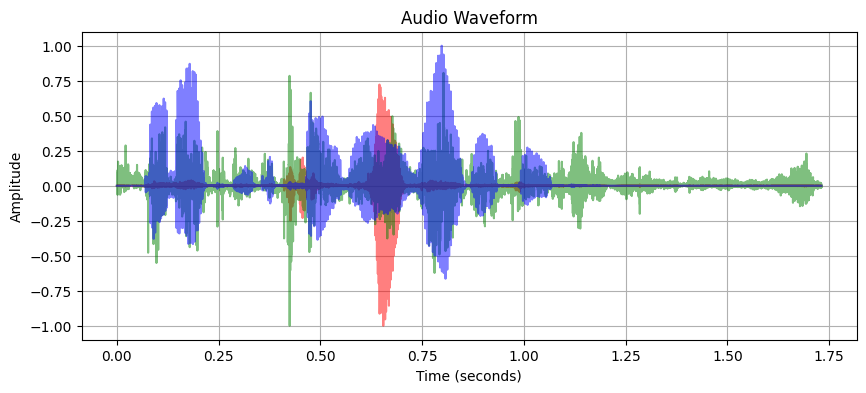

tensor(0.0643)
tensor(0.0794)
tensor(0.0752)


In [124]:
from IPython.display import display, Audio
audio_path="/home/xinying/Speaker2/project-speech_classification/output2.wav"
# audio_path="/home/xinying/Speaker2/project-speech_classification/dataset/1-FBCG1=origin_SX442.WAV"
import soundfile as sf
import librosa
wav,sr=librosa.load(audio_path, sr=None)
from speechbrain.inference.separation import SepformerSeparation as separator

# model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
# est_sources = model.separate_file(path=audio_path)
model = separator.from_hparams(source="speechbrain/sepformer-libri3mix", savedir='pretrained_models/sepformer-libri3mix')

est_sources = model.separate_file(path=audio_path) 

import matplotlib.pyplot as plt
import numpy as np

# 假设 est_sources 是你的音频数据，形状为 [1, 80000]
audio_data1 = est_sources[:, :, 0].squeeze()  # 将形状转换为 (80000,)
audio_data2 = est_sources[:, :, 1].squeeze()  # 将形状转换为 (80000,)
audio_data3= est_sources[:, :, 2].squeeze()  # 将形状转换为 (80000,)

# 创建时间轴，假设采样率为 16000 Hz
sr = 16000
times = np.linspace(0, len(audio_data1) / sr, num=len(audio_data1))

# 绘制波形图
plt.figure(figsize=(10, 4))  # 图形大小
plt.plot(times, audio_data1,alpha=0.5, color='red')  # 绘制波形
plt.plot(times, audio_data2,alpha=0.5, color='green')  # 绘制波形
plt.plot(times, audio_data3,alpha=0.5, color='blue')  # 绘制波形
# plt.plot(times, audio_data1,alpa=0.5, )  # 绘制波形
# plt.plot(times, audio_data1,alpa=0.5, )  # 绘制波形


plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
print(est_sources[:, :, 0].std())
print(est_sources[:, :, 1].std())
print(est_sources[:, :, 2].std())


In [123]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)